<a href="https://colab.research.google.com/github/nihemelandu/churn_clv_prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!pip install gcsfs --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== EDA SETUP ===")
# Load cleaned data from 02b
sample_df = pd.read_csv('/content/cleaned_sample_data.csv')

# Parse datetime if needed
if sample_df['event_time'].dtype == 'object':
    sample_df['event_time'] = pd.to_datetime(sample_df['event_time'], utc=True)

print(f"✓ Loaded cleaned dataset: {len(sample_df):,} rows × {sample_df.shape[1]} columns")
print(f"Date range: {sample_df['event_time'].min().date()} to {sample_df['event_time'].max().date()}")
print(f"Event types: {sample_df['event_type'].unique()}")

# Load cleaning metadata for context
try:
    import json
    with open('cleaning_metadata.json', 'r') as f:
        cleaning_metadata = json.load(f)
    print(f"✓ Loaded cleaning metadata - dataset ready for analysis")
except:
    print("⚠️  No cleaning metadata found - proceeding with EDA")

# Create time-based features for EDA
sample_df['hour'] = sample_df['event_time'].dt.hour
sample_df['day_of_week'] = sample_df['event_time'].dt.dayofweek  # 0=Monday
sample_df['day_name'] = sample_df['event_time'].dt.day_name()
sample_df['date'] = sample_df['event_time'].dt.date

print(f"✓ Time-based features created for temporal analysis")
print(f"\n🎯 EDA OBJECTIVES:")
print(f"   • Understand customer behavior patterns")
print(f"   • Identify churn indicators")
print(f"   • Analyze temporal trends")
print(f"   • Explore product/category insights")
print(f"   • Create data-driven churn definition")


=== EDA SETUP ===
✓ Loaded cleaned dataset: 109,928 rows × 10 columns
Date range: 2019-10-01 to 2019-11-30
Event types: ['view' 'cart' 'purchase']
⚠️  No cleaning metadata found - proceeding with EDA
✓ Time-based features created for temporal analysis

🎯 EDA OBJECTIVES:
   • Understand customer behavior patterns
   • Identify churn indicators
   • Analyze temporal trends
   • Explore product/category insights
   • Create data-driven churn definition


=== DATASET OVERVIEW ===
📊 DATASET COMPOSITION:
Total events: 109,928
Unique users: 102,954
Unique products: 32,218
Unique sessions: 109,100

📈 USER ACTIVITY DISTRIBUTION:
Average events per user: 1.07
Median events per user: 1.0
Users with 1 event: 96,961 (94.2%)
Users with 10+ events: 6 (0.0%)

🎭 EVENT TYPE DISTRIBUTION:
view: 104,329 (94.9%)
cart: 3,893 (3.5%)
purchase: 1,706 (1.6%)


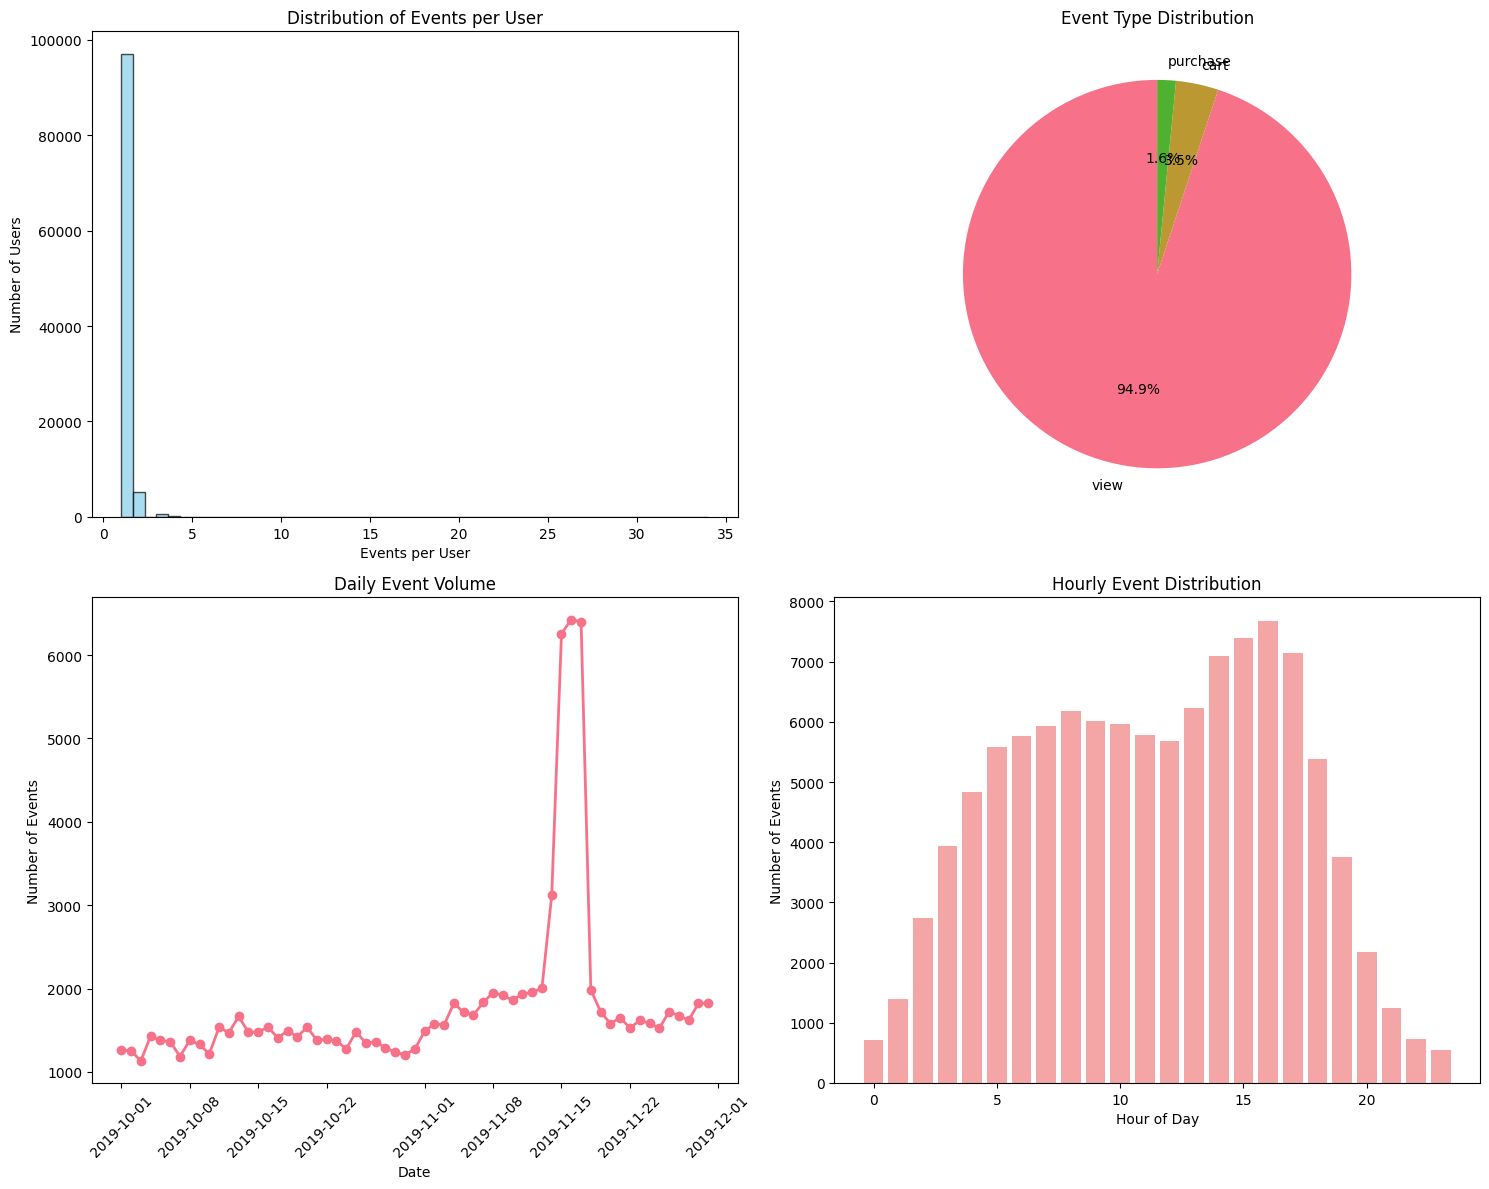


✅ High-level overview completed


In [4]:
# Dataset Overview and High-Level Statistics

print("=== DATASET OVERVIEW ===")

# Basic statistics
print(f"📊 DATASET COMPOSITION:")
print(f"Total events: {len(sample_df):,}")
print(f"Unique users: {sample_df['user_id'].nunique():,}")
print(f"Unique products: {sample_df['product_id'].nunique():,}")
print(f"Unique sessions: {sample_df['user_session'].nunique():,}")

# Events per user distribution
events_per_user = sample_df['user_id'].value_counts()
print(f"\n📈 USER ACTIVITY DISTRIBUTION:")
print(f"Average events per user: {events_per_user.mean():.2f}")
print(f"Median events per user: {events_per_user.median():.1f}")
print(f"Users with 1 event: {(events_per_user == 1).sum():,} ({(events_per_user == 1).mean()*100:.1f}%)")
print(f"Users with 10+ events: {(events_per_user >= 10).sum():,} ({(events_per_user >= 10).mean()*100:.1f}%)")

# Event type distribution
print(f"\n🎭 EVENT TYPE DISTRIBUTION:")
event_dist = sample_df['event_type'].value_counts()
event_pct = sample_df['event_type'].value_counts(normalize=True) * 100

for event, count in event_dist.items():
    pct = event_pct[event]
    print(f"{event}: {count:,} ({pct:.1f}%)")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Events per user histogram
axes[0,0].hist(events_per_user.values, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Events per User')
axes[0,0].set_ylabel('Number of Users')
axes[0,0].set_title('Distribution of Events per User')
#axes[0,0].set_yscale('log')  # Log scale due to long tail

# 2. Event type pie chart
axes[0,1].pie(event_dist.values, labels=event_dist.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Event Type Distribution')

# 3. Daily event volume
daily_events = sample_df.groupby('date').size()
axes[1,0].plot(daily_events.index, daily_events.values, marker='o', linewidth=2)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Number of Events')
axes[1,0].set_title('Daily Event Volume')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Hourly patterns
hourly_events = sample_df['hour'].value_counts().sort_index()
axes[1,1].bar(hourly_events.index, hourly_events.values, color='lightcoral', alpha=0.7)
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Number of Events')
axes[1,1].set_title('Hourly Event Distribution')

plt.tight_layout()
plt.show()

print(f"\n✅ High-level overview completed")

=== CUSTOMER JOURNEY & FUNNEL ANALYSIS ===
Building user journey data...
✓ User journey data created for 102,954 users

🔄 CONVERSION FUNNEL ANALYSIS:
Total Users: 102,954
Users who Viewed: 97,877 (95.1%)
Users who Added to Cart: 3,865 (3.8%)
Users who Purchased: 1,702 (1.7%)

Conversion Rates:
View → Cart: 3.9%
View → Purchase: 1.7%
Cart → Purchase: 44.0%

👥 USER BEHAVIOR SEGMENTS:
segment
Browser           97406
Unknown            3526
Purchaser          1702
Cart_Abandoner      320
Name: count, dtype: int64

Segment percentages:
Browser: 94.6%
Unknown: 3.4%
Purchaser: 1.7%
Cart_Abandoner: 0.3%


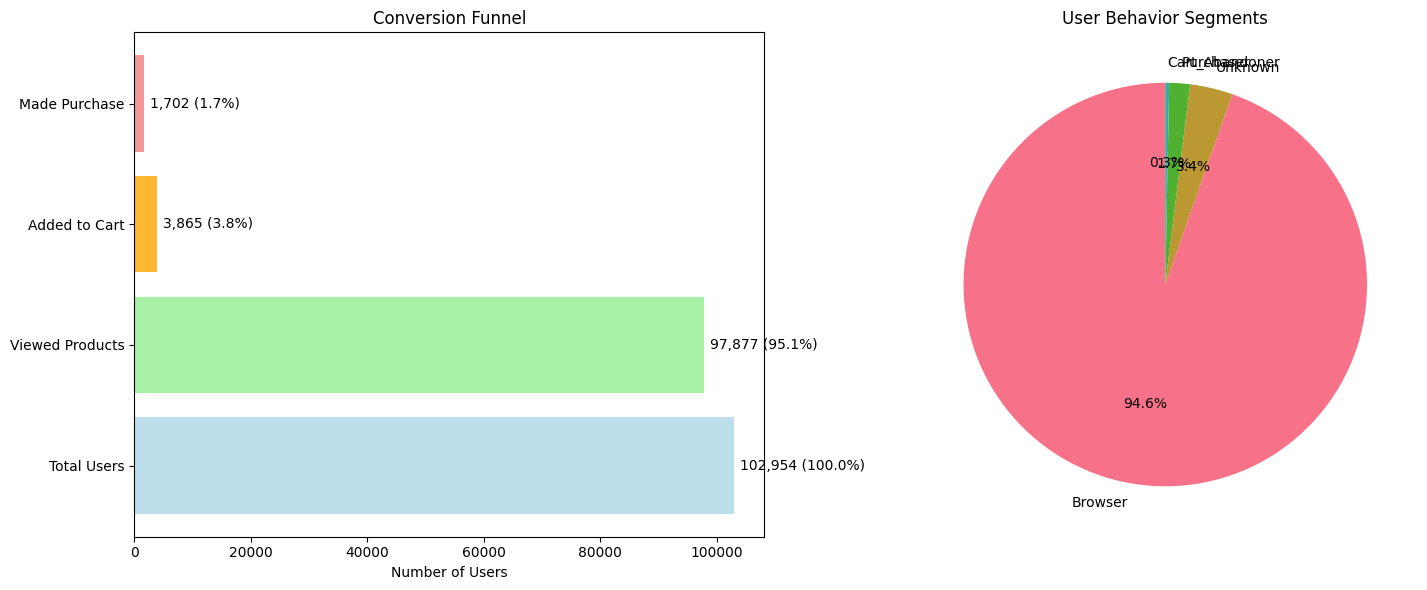


✅ Customer journey analysis completed


In [5]:
 # Customer Journey and Funnel Analysis

print("=== CUSTOMER JOURNEY & FUNNEL ANALYSIS ===")

# Create user-level summary
print("Building user journey data...")
user_summary = sample_df.groupby('user_id').agg({
    'event_type': ['count', lambda x: x.nunique()],
    'product_id': 'nunique',
    'price': ['sum', 'mean', 'count'],
    'event_time': ['min', 'max'],
    'user_session': 'nunique'
}).round(2)

# Flatten column names
user_summary.columns = ['total_events', 'unique_event_types', 'unique_products',
                       'total_spent', 'avg_price', 'price_interactions',
                       'first_event', 'last_event', 'unique_sessions']

# Calculate time span for each user
user_summary['time_span_hours'] = (
    user_summary['last_event'] - user_summary['first_event']
).dt.total_seconds() / 3600

# Add event type flags
for event_type in sample_df['event_type'].unique():
    # Get users who have this event type
    users_with_event = sample_df[sample_df['event_type'] == event_type]['user_id'].unique()
    # Create boolean flag: True if user has this event type
    user_summary[f'has_{event_type}'] = user_summary.index.isin(users_with_event)

print(f"✓ User journey data created for {len(user_summary):,} users")

# Funnel Analysis
print(f"\n🔄 CONVERSION FUNNEL ANALYSIS:")

# Calculate funnel metrics
total_users = len(user_summary)
users_with_view = user_summary.get('has_view', pd.Series([False]*len(user_summary))).sum()
users_with_cart = user_summary.get('has_cart', pd.Series([False]*len(user_summary))).sum()
users_with_purchase = user_summary.get('has_purchase', pd.Series([False]*len(user_summary))).sum()

print(f"Total Users: {total_users:,}")
print(f"Users who Viewed: {users_with_view:,} ({users_with_view/total_users*100:.1f}%)")
print(f"Users who Added to Cart: {users_with_cart:,} ({users_with_cart/total_users*100:.1f}%)")
print(f"Users who Purchased: {users_with_purchase:,} ({users_with_purchase/total_users*100:.1f}%)")

# Conversion rates
if users_with_view > 0:
    view_to_cart = users_with_cart / users_with_view * 100
    view_to_purchase = users_with_purchase / users_with_view * 100
    print(f"\nConversion Rates:")
    print(f"View → Cart: {view_to_cart:.1f}%")
    print(f"View → Purchase: {view_to_purchase:.1f}%")

if users_with_cart > 0:
    cart_to_purchase = users_with_purchase / users_with_cart * 100
    print(f"Cart → Purchase: {cart_to_purchase:.1f}%")

# User behavior segments
print(f"\n👥 USER BEHAVIOR SEGMENTS:")

# Segment users by behavior
user_summary['segment'] = 'Unknown'

# Browser (views only)
browser_mask = (
    user_summary.get('has_view', False) &
    ~user_summary.get('has_cart', False) &
    ~user_summary.get('has_purchase', False)
)
user_summary.loc[browser_mask, 'segment'] = 'Browser'

# Cart Abandoner (views + cart, no purchase)
abandoner_mask = (
    user_summary.get('has_view', False) &
    user_summary.get('has_cart', False) &
    ~user_summary.get('has_purchase', False)
)
user_summary.loc[abandoner_mask, 'segment'] = 'Cart_Abandoner'

# Purchaser (has purchase)
purchaser_mask = user_summary.get('has_purchase', False)
user_summary.loc[purchaser_mask, 'segment'] = 'Purchaser'

# Segment distribution
segment_dist = user_summary['segment'].value_counts()
print(segment_dist)
print(f"\nSegment percentages:")
for segment, count in segment_dist.items():
    pct = count / len(user_summary) * 100
    print(f"{segment}: {pct:.1f}%")

# Visualize funnel and segments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Funnel chart
funnel_data = [total_users, users_with_view, users_with_cart, users_with_purchase]
funnel_labels = ['Total Users', 'Viewed Products', 'Added to Cart', 'Made Purchase']
colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']

bars = ax1.barh(range(len(funnel_data)), funnel_data, color=colors, alpha=0.8)
ax1.set_yticks(range(len(funnel_labels)))
ax1.set_yticklabels(funnel_labels)
ax1.set_xlabel('Number of Users')
ax1.set_title('Conversion Funnel')

# Add percentage labels
for i, (bar, count) in enumerate(zip(bars, funnel_data)):
    pct = count / total_users * 100
    ax1.text(bar.get_width() + total_users*0.01, bar.get_y() + bar.get_height()/2,
             f'{count:,} ({pct:.1f}%)', va='center')

# Segment pie chart
ax2.pie(segment_dist.values, labels=segment_dist.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('User Behavior Segments')

plt.tight_layout()
plt.show()

print(f"\n✅ Customer journey analysis completed")

=== CHURN DEFINITION & PATTERN ANALYSIS ===
📅 CHURN DEFINITION (CORRECTED):
Using 30-day inactivity threshold (appropriate for 2-month dataset)
Dataset range: 2019-10-01 to 2019-11-30
Analysis date (today): 2019-11-30
Churn cutoff date: 2019-10-31
Users with last activity before 2019-10-31 = Churned

📊 CHURN ANALYSIS RESULTS:
Total users analyzed: 102,954
Churned users (>30 days): 37,813
Overall churn rate: 36.7%
Active users: 65,141 (63.3%)

🚨 CHURN RISK SEGMENTATION:
Low risk: 49,426 (48.0%)
High risk: 44,994 (43.7%)
Medium risk: 8,534 (8.3%)

Risk definitions:
  High risk: 25+ days since last activity
  Medium risk: 20-25 days since last activity
  Low risk: <20 days since last activity

✅ Churn labels added to user summary for pattern analysis


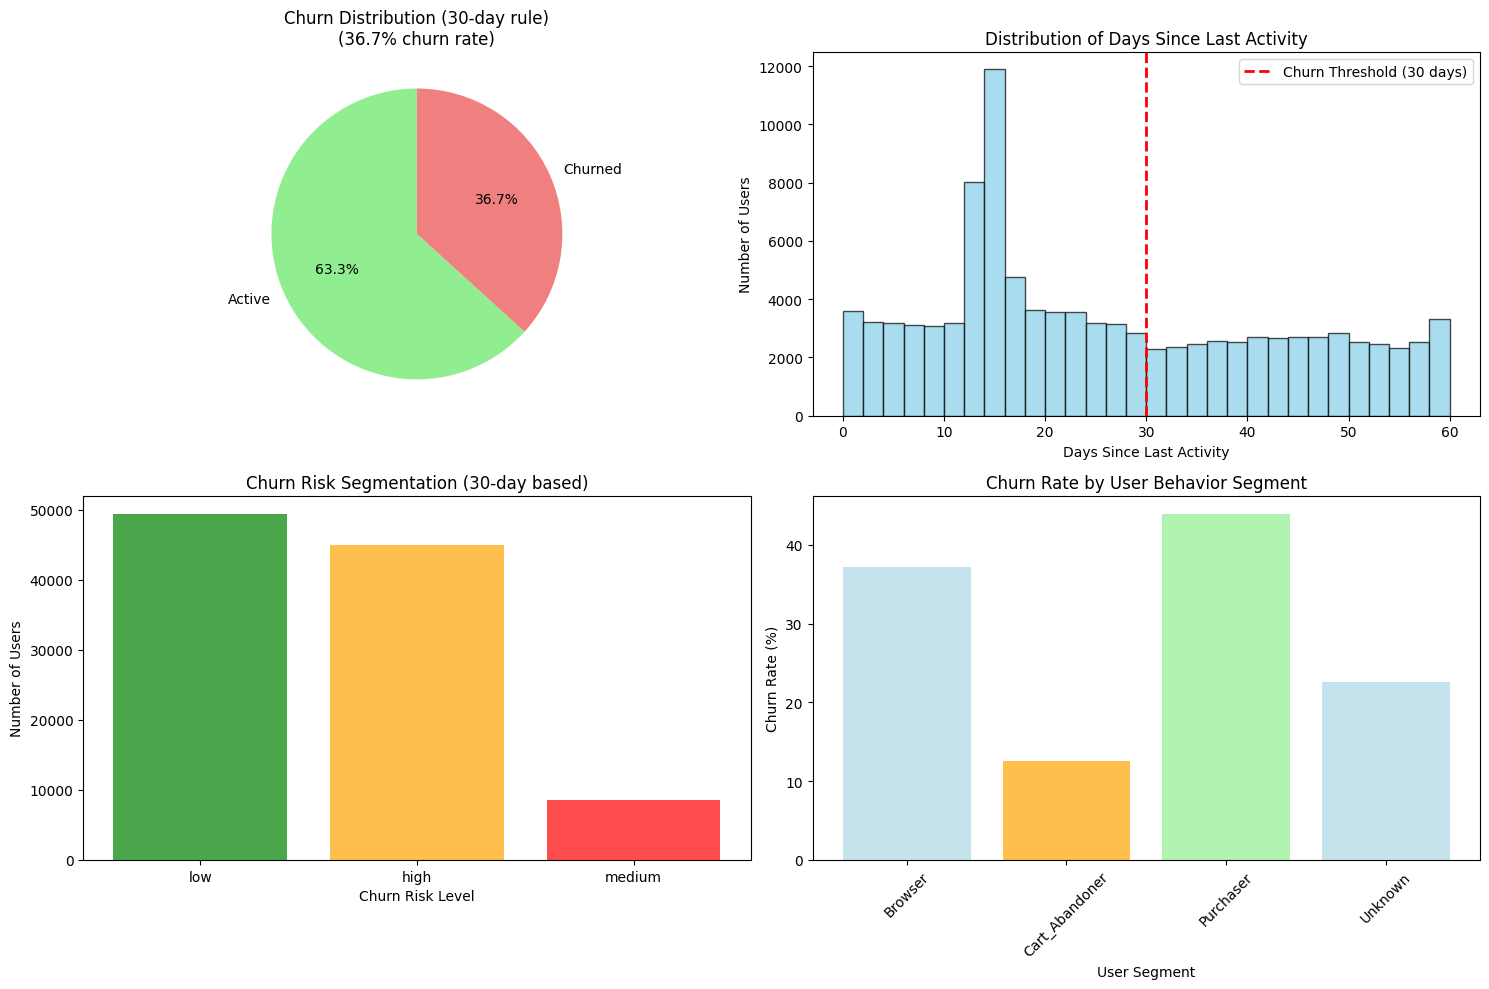


📝 NOTE: Churn definition adjusted for dataset constraints
   • 30-day rule appropriate for 60-day dataset
   • In production: Use 180-day rule with longer historical data


In [9]:
# Cell 4: Churn Definition and Pattern Analysis (CORRECTED)

print("=== CHURN DEFINITION & PATTERN ANALYSIS ===")

# Corrected churn definition based on our 2-month dataset
# Using 30-day rule instead of 180-day (appropriate for our data range)

print("📅 CHURN DEFINITION (CORRECTED):")
print("Using 30-day inactivity threshold (appropriate for 2-month dataset)")

# Calculate last activity date for each user
user_last_activity = sample_df.groupby('user_id')['event_time'].max().reset_index()
user_last_activity.columns = ['user_id', 'last_activity']

# Define analysis cutoff date (simulate "today" for historical data)
# Using last date in dataset as reference point
analysis_date = sample_df['event_time'].max()
cutoff_date = analysis_date - pd.Timedelta(days=30)  # CORRECTED: 30 days instead of 180

print(f"Dataset range: {sample_df['event_time'].min().date()} to {sample_df['event_time'].max().date()}")
print(f"Analysis date (today): {analysis_date.date()}")
print(f"Churn cutoff date: {cutoff_date.date()}")
print(f"Users with last activity before {cutoff_date.date()} = Churned")

# Identify churned vs active users
user_last_activity['days_since_last_activity'] = (
    analysis_date - user_last_activity['last_activity']
).dt.days

user_last_activity['churned'] = user_last_activity['days_since_last_activity'] > 30  # CORRECTED: 30 days
user_last_activity['churn_risk'] = user_last_activity['days_since_last_activity'].apply(
    lambda x: 'high' if x > 25 else ('medium' if x > 20 else 'low')  # CORRECTED: Adjusted thresholds
)

# Churn statistics
total_users = len(user_last_activity)
churned_users = user_last_activity['churned'].sum()
churn_rate = churned_users / total_users * 100

print(f"\n📊 CHURN ANALYSIS RESULTS:")
print(f"Total users analyzed: {total_users:,}")
print(f"Churned users (>30 days): {churned_users:,}")
print(f"Overall churn rate: {churn_rate:.1f}%")
print(f"Active users: {total_users - churned_users:,} ({100-churn_rate:.1f}%)")

# Risk segmentation (adjusted for 30-day rule)
risk_dist = user_last_activity['churn_risk'].value_counts()
print(f"\n🚨 CHURN RISK SEGMENTATION:")
for risk, count in risk_dist.items():
    pct = count / total_users * 100
    print(f"{risk.capitalize()} risk: {count:,} ({pct:.1f}%)")

print(f"\nRisk definitions:")
print(f"  High risk: 25+ days since last activity")
print(f"  Medium risk: 20-25 days since last activity")
print(f"  Low risk: <20 days since last activity")

# Merge churn labels back with user summary for pattern analysis
user_summary_with_churn = user_summary.merge(
    user_last_activity[['user_id', 'churned', 'churn_risk', 'days_since_last_activity']],
    left_index=True,
    right_on='user_id',
    how='left'
)

print(f"\n✅ Churn labels added to user summary for pattern analysis")

# Visualize churn distribution (updated thresholds)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Churn rate pie chart
churn_counts = user_last_activity['churned'].value_counts()
labels = ['Active', 'Churned']
colors = ['lightgreen', 'lightcoral']
axes[0,0].pie(churn_counts.values, labels=labels, autopct='%1.1f%%',
              colors=colors, startangle=90)
axes[0,0].set_title(f'Churn Distribution (30-day rule)\n({churn_rate:.1f}% churn rate)')

# 2. Days since last activity histogram
axes[0,1].hist(user_last_activity['days_since_last_activity'],
               bins=30, alpha=0.7, color='skyblue', edgecolor='black')  # CORRECTED: 30 bins
axes[0,1].axvline(x=30, color='red', linestyle='--', linewidth=2, label='Churn Threshold (30 days)')  # CORRECTED
axes[0,1].set_xlabel('Days Since Last Activity')
axes[0,1].set_ylabel('Number of Users')
axes[0,1].set_title('Distribution of Days Since Last Activity')
axes[0,1].legend()

# 3. Risk segmentation
risk_counts = user_last_activity['churn_risk'].value_counts()
axes[1,0].bar(risk_counts.index, risk_counts.values,
              color=['green', 'orange', 'red'], alpha=0.7)
axes[1,0].set_xlabel('Churn Risk Level')
axes[1,0].set_ylabel('Number of Users')
axes[1,0].set_title('Churn Risk Segmentation (30-day based)')

# 4. Churn by user behavior segments
if 'segment' in user_summary_with_churn.columns:
    segment_churn = user_summary_with_churn.groupby('segment')['churned'].agg(['count', 'sum'])
    segment_churn['churn_rate'] = segment_churn['sum'] / segment_churn['count'] * 100

    axes[1,1].bar(segment_churn.index, segment_churn['churn_rate'],
                  color=['lightblue', 'orange', 'lightgreen'], alpha=0.7)
    axes[1,1].set_xlabel('User Segment')
    axes[1,1].set_ylabel('Churn Rate (%)')
    axes[1,1].set_title('Churn Rate by User Behavior Segment')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n📝 NOTE: Churn definition adjusted for dataset constraints")
print(f"   • 30-day rule appropriate for 60-day dataset")
print(f"   • In production: Use 180-day rule with longer historical data")

In [ ]:
# Cell 5: Behavioral Pattern Analysis - Churned vs Active Users

print("=== BEHAVIORAL PATTERN ANALYSIS ===")
print("Comparing churned vs active users to identify churn indicators...")

# Split users into churned and active groups
churned_users = user_summary_with_churn[user_summary_with_churn['churned'] == True]
active_users = user_summary_with_churn[user_summary_with_churn['churned'] == False]

print(f"\nCohort sizes:")
print(f"Churned users: {len(churned_users):,}")
print(f"Active users: {len(active_users):,}")

# Behavioral comparison metrics
print(f"\n📈 BEHAVIORAL DIFFERENCES:")

behavioral_metrics = [
    'total_events', 'unique_event_types', 'unique_products',
    'total_spent', 'avg_price', 'unique_sessions', 'time_span_hours'
]

comparison_stats = {}
for metric in behavioral_metrics:
    if metric in churned_users.columns and metric in active_users.columns:
        churned_mean = churned_users[metric].mean()
        active_mean = active_users[metric].mean()
        difference = ((active_mean - churned_mean) / churned_mean * 100) if churned_mean != 0 else 0

        comparison_stats[metric] = {
            'churned_mean': churned_mean,
            'active_mean': active_mean,
            'difference_pct': difference
        }

        print(f"{metric}:")
        print(f"  Churned: {churned_mean:.2f}")
        print(f"  Active: {active_mean:.2f}")
        print(f"  Difference: {difference:+.1f}% {'📈' if difference > 0 else '📉'}")
        print()

# Event type behavior comparison
print(f"📊 EVENT TYPE BEHAVIOR:")
event_types = ['has_view', 'has_cart', 'has_purchase']

for event_type in event_types:
    if event_type in churned_users.columns:
        churned_rate = churned_users[event_type].mean() * 100
        active_rate = active_users[event_type].mean() * 100
        difference = active_rate - churned_rate

        print(f"{event_type.replace('has_', '').capitalize()}:")
        print(f"  Churned users: {churned_rate:.1f}%")
        print(f"  Active users: {active_rate:.1f}%")
        print(f"  Difference: {difference:+.1f}pp")
        print()

# Statistical significance testing (basic)
from scipy import stats

print(f"🧪 STATISTICAL SIGNIFICANCE TESTS:")
for metric in ['total_events', 'unique_products', 'total_spent']:
    if metric in churned_users.columns and metric in active_users.columns:
        # Remove any infinite or NaN values
        churned_values = churned_users[metric].replace([np.inf, -np.inf], np.nan).dropna()
        active_values = active_users[metric].replace([np.inf, -np.inf], np.nan).dropna()

        if len(churned_values) > 0 and len(active_values) > 0:
            statistic, p_value = stats.mannwhitneyu(active_values, churned_values, alternative='two-sided')
            significance = "***" if p_value < 0.001 else ("**" if p_value < 0.01 else ("*" if p_value < 0.05 else ""))
            print(f"{metric}: p-value = {p_value:.4f} {significance}")

print("\n* p<0.05, ** p<0.01, *** p<0.001")

# Create behavioral comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Total events comparison
axes[0,0].hist([churned_users['total_events'], active_users['total_events']],
               bins=30, alpha=0.7, label=['Churned', 'Active'], color=['red', 'green'])
axes[0,0].set_xlabel('Total Events')
axes[0,0].set_ylabel('Number of Users')
axes[0,0].set_title('Total Events Distribution')
axes[0,0].legend()
axes[0,0].set_yscale('log')

# 2. Unique products comparison
axes[0,1].hist([churned_users['unique_products'], active_users['unique_products']],
               bins=30, alpha=0.7, label=['Churned', 'Active'], color=['red', 'green'])
axes[0,1].set_xlabel('Unique Products Viewed')
axes[0,1].set_ylabel('Number of Users')
axes[0,1].set_title('Product Diversity Distribution')
axes[0,1].legend()
axes[0,1].set_yscale('log')

# 3. Total spent comparison
if 'total_spent' in churned_users.columns:
    # Filter out extreme outliers for visualization
    churned_spent = churned_users['total_spent'][churned_users['total_spent'] < churned_users['total_spent'].quantile(0.95)]
    active_spent = active_users['total_spent'][active_users['total_spent'] < active_users['total_spent'].quantile(0.95)]

    axes[0,2].hist([churned_spent, active_spent],
                   bins=30, alpha=0.7, label=['Churned', 'Active'], color=['red', 'green'])
    axes[0,2].set_xlabel('Total Spent ($)')
    axes[0,2].set_ylabel('Number of Users')
    axes[0,2].set_title('Spending Distribution')
    axes[0,2].legend()

# 4. Session behavior
axes[1,0].hist([churned_users['unique_sessions'], active_users['unique_sessions']],
               bins=30, alpha=0.7, label=['Churned', 'Active'], color=['red', 'green'])
axes[1,0].set_xlabel('Unique Sessions')
axes[1,0].set_ylabel('Number of Users')
axes[1,0].set_title('Session Frequency Distribution')
axes[1,0].legend()

# 5. Time span behavior
axes[1,1].hist([churned_users['time_span_hours'], active_users['time_span_hours']],
               bins=30, alpha=0.7, label=['Churned', 'Active'], color=['red', 'green'])
axes[1,1].set_xlabel('Time Span (Hours)')
axes[1,1].set_ylabel('Number of Users')
axes[1,1].set_title('Customer Lifetime Distribution')
axes[1,1].legend()

# 6. Event type rates comparison
event_comparison = []
for event_type in ['has_view', 'has_cart', 'has_purchase']:
    if event_type in churned_users.columns:
        event_comparison.append([
            churned_users[event_type].mean() * 100,
            active_users[event_type].mean() * 100
        ])

if event_comparison:
    event_labels = ['View', 'Cart', 'Purchase']
    x = np.arange(len(event_labels))
    width = 0.35

    churned_rates = [item[0] for item in event_comparison]
    active_rates = [item[1] for item in event_comparison]

    axes[1,2].bar(x - width/2, churned_rates, width, label='Churned', color='red', alpha=0.7)
    axes[1,2].bar(x + width/2, active_rates, width, label='Active', color='green', alpha=0.7)
    axes[1,2].set_xlabel('Event Type')
    axes[1,2].set_ylabel('Percentage of Users (%)')
    axes[1,2].set_title('Event Type Participation Rates')
    axes[1,2].set_xticks(x)
    axes[1,2].set_xticklabels(event_labels)
    axes[1,2].legend()

plt.tight_layout()
plt.show()

print(f"\n✅ Behavioral pattern analysis completed")

1. They question the data source before analyzing
↳ "Where did this data come from?" is always their first question

2. They investigate outliers instead of removing them
↳ Treat anomalies as insights, not inconveniences

3. They consider what's missing in the dataset
↳ Pay attention to the silent gaps—they often speak volumes

4. They challenge their own assumptions first
↳ Actively seek contradictory evidence to test hypotheses

5. They distinguish correlation from causation
↳ Never jump to "X causes Y" without proper evidence

6. They present multiple interpretations of the same data
↳ Share alternative explanations before conclusions

7. They acknowledge the limitations of their analysis
↳ Transparently communicate what the data cannot tell you

8. They translate technical findings into business language
↳ Convert complex patterns into actionable recommendations

9. They ask "so what?" after every insight
↳ Relentlessly connect findings to concrete business value

10. They design visualizations that reveal, not decorate
↳ Choose clarity over complexity in every chart

11. They test against historical context
↳ Compare findings against past patterns before declaring trends

12. They consider second-order effects
↳ Look beyond immediate impacts to downstream consequences

13. They anticipate stakeholder questions
↳ Prepare answers for the questions not yet asked

14. They recognize when more data won't help
↳ Know when to stop collecting and start deciding

15. They highlight risks alongside opportunities
↳ Present the complete picture, not just the favorable view

16. They revisit past analyses to validate predictions
↳ Close the loop by testing if insights actually delivered value

Data analysis isn't about having all the answers.

It's about asking the right questions.